<a href="https://colab.research.google.com/github/Jin0704/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd

In [90]:
# 1. 在你的 Colab 程式碼中載入 Titanic 資料集的 `train.csv` 資料集，可以參考這一篇 教學 中的網址或上傳方法。

# （資料網址：https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv）

# 2. 請根據 Kaggle 文件瞭解 Titanic 資料中所有欄位的定義為何？

# 3. 進一步觀察每一個欄位「數值欄位/類別欄位」與「是否生存欄位」之關係程度，找出關係大的欄位。

# （Hint: 可以利用視覺化圖表、 correlation、feature importance 等方法）

# 4. 承上題，請問你是如何定義與解讀什麼稱為「關係大」呢？

In [91]:
# 1. 在你的 Colab 程式碼中載入 Titanic 資料集的 `train.csv` 資料集，可以參考這一篇 教學 中的網址或上傳方法。

# （資料網址：https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv）

url = 'https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv'
full = pd.read_csv(url)
df = pd.read_csv(url)
target = df['Survived']

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [92]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [93]:
#判斷是否有空值以及是否要欄位轉型
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<ipython-input-94-8a00a6a4e961>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

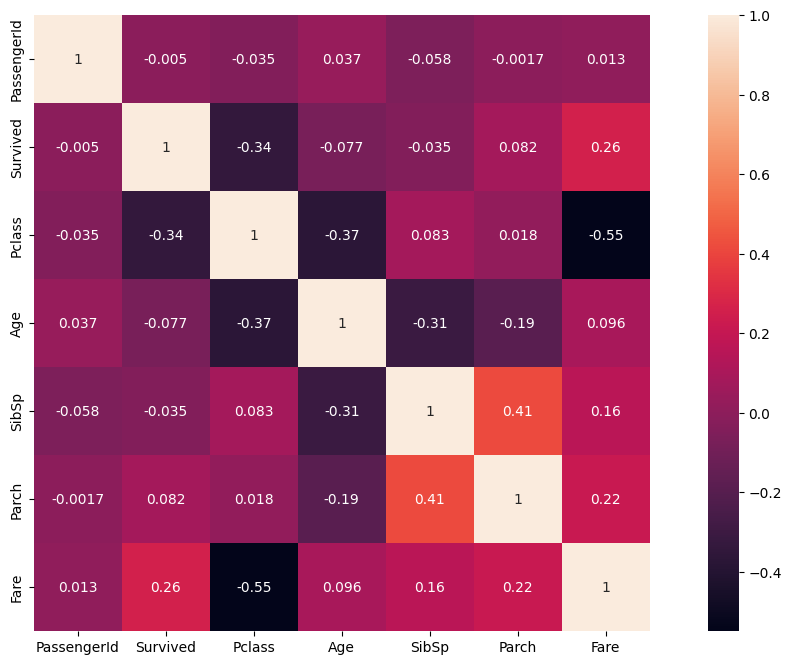

In [94]:
#進一步觀察每一個欄位「數值欄位/類別欄位」與「是否生存欄位」之關係程度，找出關係大的欄位。
import matplotlib.pyplot as plt
import seaborn as sns

df.drop(columns='Name')
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,square=True,annot=True)

In [95]:
corr = df.corr()['Survived']
print(corr.apply(lambda x:x>0))

PassengerId    False
Survived        True
Pclass         False
Age            False
SibSp          False
Parch           True
Fare            True
Name: Survived, dtype: bool


<ipython-input-95-0bca52c87916>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()['Survived']


In [96]:
# 在資料分析的工作流程中，在不考慮準確度情況下有哪些必備的環節？
# 1. 檢查資料是否有缺失
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
#由上述結果知道欄位: Age,Cabin,Embarked 有缺失資料
#2.針對缺失資料進行處理
#Age : 用mean處理missing value
df['Age'].fillna(df['Age'].mean(),inplace=True)
#Cabin: 缺失太多資料 先dropColumn處理
df.drop(columns='Cabin',inplace=True)
#Embarked:缺失資料較少 這邊考慮直接先dropna
df.dropna(subset='Embarked',inplace=True)
full.dropna(subset='Embarked',inplace=True)

In [98]:
#確認沒有缺失值
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [99]:

#3;類別欄位轉換數值欄位
#轉換Sex跟Embarked欄位
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [100]:
#建立df_train資料集
df_train = df[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [101]:
columns_X = set(df_train.columns)-{'Survived'}
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]


<ipython-input-101-bc5947e8b83a>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_X = df_train[columns_X]


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(), cv=5, scoring='accuracy')
print(scores)

[0.78089888 0.78089888 0.78089888 0.76404494 0.81355932]


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 83.3+ KB


<ipython-input-104-0b2376258323>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),square=True,annot=True)


<Axes: >

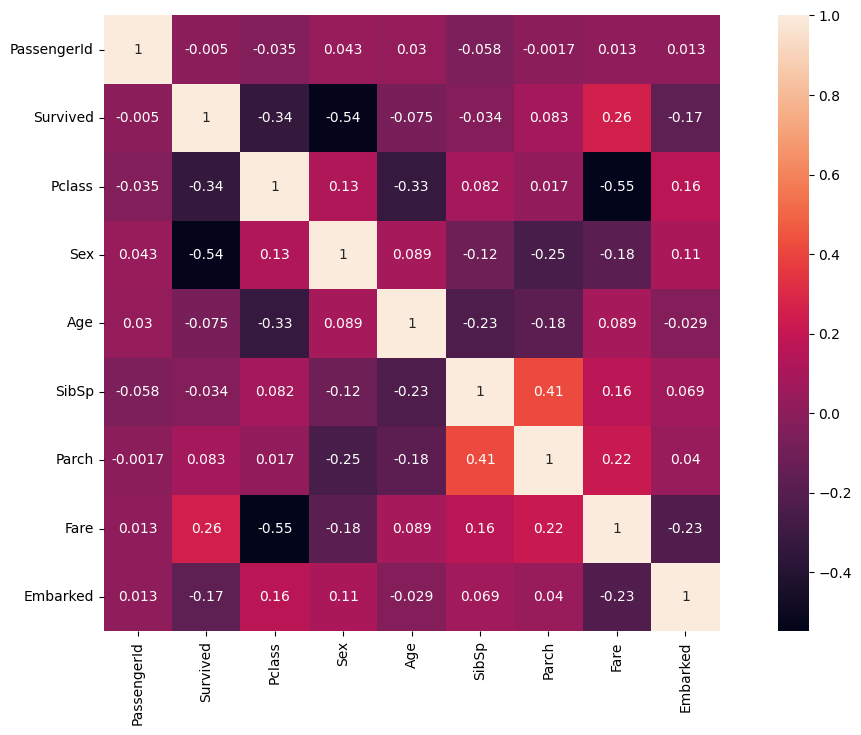

In [104]:
#1. 請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),square=True,annot=True)
# 根據heatmap來看，關聯越接近0的代表關聯性越低，所以在這邊我認為最多餘的欄位是PassengerId這個欄位，當然我們也可以設計一個基本的門檻例如說Math.abs(cor)>0.1來做一個篩選的條件，
# 所以會排除的欄位應該是PassengerId,Age,SibSp,Parch這四個欄位，另外Name的欄位在當前也會進行排除，因為這個欄位去做數值轉換會讓整個資料集的維度太大，較不適合

In [105]:
# 針對「有缺失值」的欄位，嘗試不同的處理策略（例如：常數、中位數、平均數填補）比較結果。
# 針對Age 欄位來做調整
url = 'https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv'
df2 = pd.read_csv(url)
df2.info()
#針對缺失資料進行處理
#Cabin: 缺失太多資料 先dropColumn處理
df2.drop(columns='Cabin',inplace=True)
#Embarked:缺失資料較少 這邊考慮直接先dropna
df2.dropna(subset='Embarked',inplace=True)
#Age : 用mean處理missing value
df2['mean_age'] = df['Age'].fillna(df['Age'].mean())
df2['mode_age'] = df['Age'].fillna(df['Age'].mode())
df2['median_age'] = df['Age'].fillna(df['Age'].median())

print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived

In [106]:
#3;類別欄位轉換數值欄位
#轉換Sex跟Embarked欄位
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df2['Sex'] = label_encoder.fit_transform(df2['Sex'])
# df2['Embarked'] = label_encoder.fit_transform(df2['Embarked'])
embark = pd.get_dummies(df2['Embarked'], prefix="Embarked")
pclass = pd.get_dummies(df2['Pclass'], prefix="Pclass")
df2 = pd.concat([df2,embark],axis=1)
df2 = pd.concat([df2,pclass],axis=1)
print(df2.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Embarked  mean_age  mode_age  median_age  \
0         A/5 21171   7.2500        S      22.0      22.0        22.0   
1          PC 17599  71.2833        C      38.0      38.0        38.0   
2  STON/O2. 3101282   7.9250        S      26.0      26.0        26.0   
3   

In [107]:
#建立df_train資料集
df_train_mean = df2[['PassengerId','Survived','Pclass_1','Pclass_2','Pclass_3','Sex','mean_age','SibSp','Parch','Fare','Embarked_C','Embarked_S','Embarked_Q']]
df_train_mode = df2[['PassengerId','Survived','Pclass_1','Pclass_2','Pclass_3','Sex','mode_age','SibSp','Parch','Fare','Embarked_C','Embarked_S','Embarked_Q']]
df_train_median = df2[['PassengerId','Survived','Pclass_1','Pclass_2','Pclass_3','Sex','median_age','SibSp','Parch','Fare','Embarked_C','Embarked_S','Embarked_Q']]

columns_mean_X = set(df_train_mean.columns)-{'Survived'}
columns_mode_X = set(df_train_mode.columns)-{'Survived'}
columns_median_X = set(df_train_median.columns)-{'Survived'}
columns_y = ['Survived']

train_mean_X = df2[columns_mean_X]
train_mode_X = df2[columns_mode_X]
train_median_X = df2[columns_median_X]
train_y = df2[columns_y]


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores_mean = cross_val_score(log, train_mean_X, train_y.values.ravel(), cv=5, scoring='accuracy')
scores_mode = cross_val_score(log, train_mode_X, train_y.values.ravel(), cv=5, scoring='accuracy')
scores_median = cross_val_score(log, train_median_X, train_y.values.ravel(), cv=5, scoring='accuracy')
print('mean age score')
print(scores_mean)
print('mode age score')
print(scores_mode)
print('median age score')
print(scores_median)

<ipython-input-107-2c26bde85e2b>:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_mean_X = df2[columns_mean_X]
<ipython-input-107-2c26bde85e2b>:12: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_mode_X = df2[columns_mode_X]
<ipython-input-107-2c26bde85e2b>:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_median_X = df2[columns_median_X]


mean age score
[0.78089888 0.78089888 0.79213483 0.76966292 0.83615819]
mode age score
[0.78089888 0.78089888 0.78651685 0.76966292 0.83050847]
median age score
[0.78089888 0.78089888 0.78651685 0.76966292 0.83050847]


In [108]:
#特徵工程
title = pd.DataFrame()

title['Title'] = df2['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
print(title.head(10))
Title_Dictionary = {
    "Capt":"Officer",
    "Col":"Officer",
    "Major":"Officer",
    "Jonkheer":"Royalty",
    "Don":"Royalty",
    "Sir":"Royalty",
    "Dr":"Officer",
    "Rev":"Officer",
    "the Countess":"Royalty",
    "Dona":"Royalty",
    "Mme":"Mrs",
    "Mile":"Miss",
    "Ms":"Mrs",
    "Mr":"Mr",
    "Mrs":"Mrs",
    "Miss":"Miss",
    "Master":"Master",
    "Lady":"Royalty"
}
print('After Map')
title['Title'] = title.Title.map(Title_Dictionary)
print(title.head(10))
title = pd.get_dummies(title.Title)
title

    Title
0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
5      Mr
6      Mr
7  Master
8     Mrs
9     Mrs
After Map
    Title
0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
5      Mr
6      Mr
7  Master
8     Mrs
9     Mrs


,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,1,0
887,0,1,0,0,0,0
888,0,1,0,0,0,0
889,0,0,1,0,0,0


In [109]:
df3 = pd.concat([df2,title],axis=1)

In [115]:
#建立df_train資料集
df_train_mean = df3[['PassengerId','Survived','Pclass_1','Pclass_2','Pclass_3','Sex','mean_age','SibSp','Parch','Fare','Embarked_C','Embarked_S','Embarked_Q','Master','Miss','Mr','Mrs','Officer','Royalty']]
df_train_mode = df3[['PassengerId','Survived','Pclass_1','Pclass_2','Pclass_3','Sex','mode_age','SibSp','Parch','Fare','Embarked_C','Embarked_S','Embarked_Q','Master','Miss','Mr','Mrs','Officer','Royalty']]
df_train_median = df3[['PassengerId','Survived','Pclass_1','Pclass_2','Pclass_3','Sex','median_age','SibSp','Parch','Fare','Embarked_C','Embarked_S','Embarked_Q','Master','Miss','Mr','Mrs','Officer','Royalty']]

columns_mean_X = set(df_train_mean.columns)-{'Survived'}
columns_mode_X = set(df_train_mode.columns)-{'Survived'}
columns_median_X = set(df_train_median.columns)-{'Survived'}
columns_y = ['Survived']

train_mean_X = df3[columns_mean_X]
train_mode_X = df3[columns_mode_X]
train_median_X = df3[columns_median_X]
train_y = df3[columns_y]


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores_mean = cross_val_score(log, train_mean_X, train_y.values.ravel(), cv=5, scoring='accuracy')
scores_mode = cross_val_score(log, train_mode_X, train_y.values.ravel(), cv=5, scoring='accuracy')
scores_median = cross_val_score(log, train_median_X, train_y.values.ravel(), cv=5, scoring='accuracy')
print('mean age score')
print(scores_mean.mean())
print('mode age score')
print(scores_mode.mean())
print('median age score')
print(scores_median.mean())

<ipython-input-115-54697e2f3d75>:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_mean_X = df3[columns_mean_X]
<ipython-input-115-54697e2f3d75>:12: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_mode_X = df3[columns_mode_X]
<ipython-input-115-54697e2f3d75>:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_median_X = df3[columns_median_X]


mean age score
0.8245730971878371
mode age score
0.8245730971878371
median age score
0.8245730971878371


In [111]:
#cabin
cabin = pd.DataFrame()

cabin['Cabin'] = full.Cabin.fillna('U')

cabin['Cabin'] = cabin['Cabin'].map(lambda c:c[0])
print(cabin.head())

cabin = pd.get_dummies(cabin['Cabin'], prefix='Cabin')
print(cabin.head())

  Cabin
0     U
1     C
2     U
3     C
4     U
   Cabin_A  Cabin_B  Cabin_C  Cabin_D  Cabin_E  Cabin_F  Cabin_G  Cabin_T  \
0        0        0        0        0        0        0        0        0   
1        0        0        1        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        1        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   Cabin_U  
0        1  
1        0  
2        1  
3        0  
4        1  


In [117]:
#family size
family = pd.DataFrame()
family['FamilySize'] = full['Parch']+full['SibSp']+1

family['Family_Single'] = family['FamilySize'].map(lambda s: 1 if s==1 else 0)
family['Family_Small'] = family['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
family['Family_Large'] = family['FamilySize'].map(lambda s: 1 if s>4 else 0)

print(family.head())

   FamilySize  Family_Single  Family_Small  Family_Large
0           2              0             1             0
1           2              0             1             0
2           1              1             0             0
3           2              0             1             0
4           1              1             0             0


In [118]:
#ticket
def cleanTicket( ticket):
  ticket = ticket.replace('.','')
  ticket = ticket.replace('/','')
  ticket = ticket.split()
  ticket = map(lambda t: t.strip(), ticket)
  ticket = list(filter( lambda t: not t.isdigit(), ticket))
  if len(ticket)>0:
    return ticket[0]
  else:
    return 'XXX'

ticket = pd.DataFrame()

ticket['Ticket']=full['Ticket'].map(cleanTicket)
ticket = pd.get_dummies(ticket['Ticket'], prefix='Ticket')

print(ticket.shape)
print(ticket.head())

(889, 31)
   Ticket_A4  Ticket_A5  Ticket_AS  Ticket_C  Ticket_CA  Ticket_CASOTON  \
0          0          1          0         0          0               0   
1          0          0          0         0          0               0   
2          0          0          0         0          0               0   
3          0          0          0         0          0               0   
4          0          0          0         0          0               0   

   Ticket_FC  Ticket_FCC  Ticket_Fa  Ticket_LINE  ...  Ticket_SOPP  \
0          0           0          0            0  ...            0   
1          0           0          0            0  ...            0   
2          0           0          0            0  ...            0   
3          0           0          0            0  ...            0   
4          0           0          0            0  ...            0   

   Ticket_SOTONO2  Ticket_SOTONOQ  Ticket_SP  Ticket_STONO  Ticket_STONO2  \
0               0               0        

In [119]:
df_x = pd.concat([df3,cabin,family],axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    889 non-null    int64  
 1   Survived       889 non-null    int64  
 2   Pclass         889 non-null    int64  
 3   Name           889 non-null    object 
 4   Sex            889 non-null    int64  
 5   Age            712 non-null    float64
 6   SibSp          889 non-null    int64  
 7   Parch          889 non-null    int64  
 8   Ticket         889 non-null    object 
 9   Fare           889 non-null    float64
 10  Embarked       889 non-null    object 
 11  mean_age       889 non-null    float64
 12  mode_age       889 non-null    float64
 13  median_age     889 non-null    float64
 14  Embarked_C     889 non-null    uint8  
 15  Embarked_Q     889 non-null    uint8  
 16  Embarked_S     889 non-null    uint8  
 17  Pclass_1       889 non-null    uint8  
 18  Pclass_2  

In [120]:
#建立df_train資料集
df_train_mean = df_x[['PassengerId','Survived','Pclass_1','Pclass_2','Pclass_3','Sex','mean_age','SibSp','Parch','Fare','Embarked_C','Embarked_S','Embarked_Q','Master','Miss','Mr','Mrs','Officer','Royalty',
                     'Cabin_A','Cabin_B','Cabin_C','Cabin_D','Cabin_E','Cabin_F','Cabin_G','Cabin_T','Cabin_U','Family_Single','Family_Small','Family_Large']]
df_train_mode = df_x[['PassengerId','Survived','Pclass_1','Pclass_2','Pclass_3','Sex','mode_age','SibSp','Parch','Fare','Embarked_C','Embarked_S','Embarked_Q','Master','Miss','Mr','Mrs','Officer','Royalty',
                      'Cabin_A','Cabin_B','Cabin_C','Cabin_D','Cabin_E','Cabin_F','Cabin_G','Cabin_T','Cabin_U','Family_Single','Family_Small','Family_Large']]
df_train_median = df_x[['PassengerId','Survived','Pclass_1','Pclass_2','Pclass_3','Sex','median_age','SibSp','Parch','Fare','Embarked_C','Embarked_S','Embarked_Q','Master','Miss','Mr','Mrs','Officer','Royalty',
                        'Cabin_A','Cabin_B','Cabin_C','Cabin_D','Cabin_E','Cabin_F','Cabin_G','Cabin_T','Cabin_U','Family_Single','Family_Small','Family_Large']]

columns_mean_X = set(df_train_mean.columns)-{'Survived'}
columns_mode_X = set(df_train_mode.columns)-{'Survived'}
columns_median_X = set(df_train_median.columns)-{'Survived'}
columns_y = ['Survived']

train_mean_X = df_x[columns_mean_X]
train_mode_X = df_x[columns_mode_X]
train_median_X = df_x[columns_median_X]
train_y = df_x[columns_y]


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores_mean = cross_val_score(log, train_mean_X, train_y.values.ravel(), cv=5, scoring='accuracy')
scores_mode = cross_val_score(log, train_mode_X, train_y.values.ravel(), cv=5, scoring='accuracy')
scores_median = cross_val_score(log, train_median_X, train_y.values.ravel(), cv=5, scoring='accuracy')
print('mean age score')
print(scores_mean.mean())
print('mode age score')
print(scores_mode.mean())
print('median age score')
print(scores_median.mean())

<ipython-input-120-82a63ac07b78>:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_mean_X = df_x[columns_mean_X]
<ipython-input-120-82a63ac07b78>:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_mode_X = df_x[columns_mode_X]
<ipython-input-120-82a63ac07b78>:16: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_median_X = df_x[columns_median_X]


mean age score
0.8256776487018346
mode age score
0.8268012442074525
median age score
0.8268012442074525
